
Subfolder: AbdomenCT
Number of Images: 10000


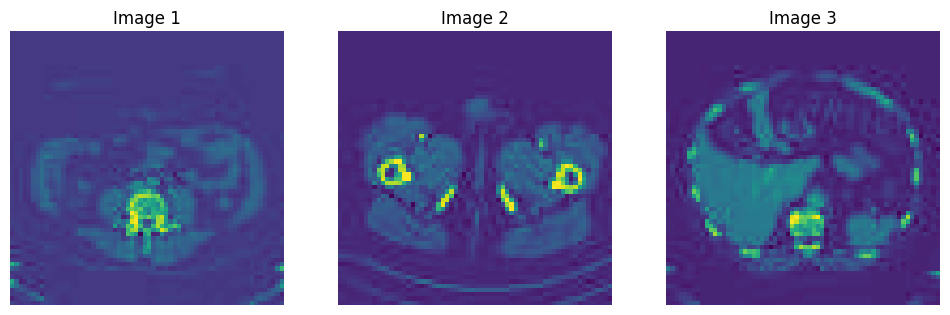


Subfolder: BreastMRI
Number of Images: 8954


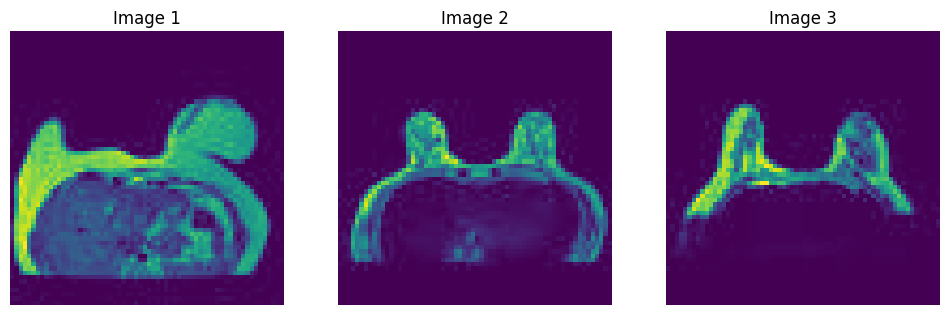


Subfolder: CXR
Number of Images: 10000


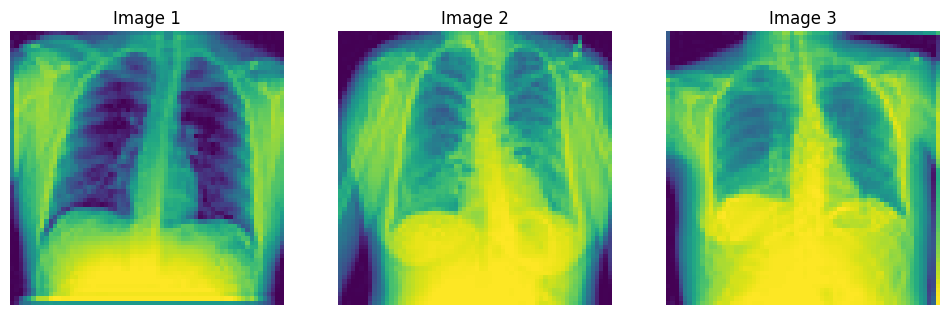


Subfolder: ChestCT
Number of Images: 10000


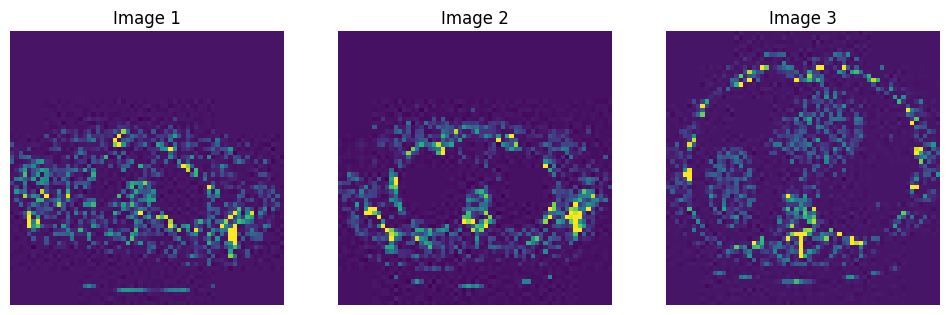


Subfolder: Hand
Number of Images: 10000


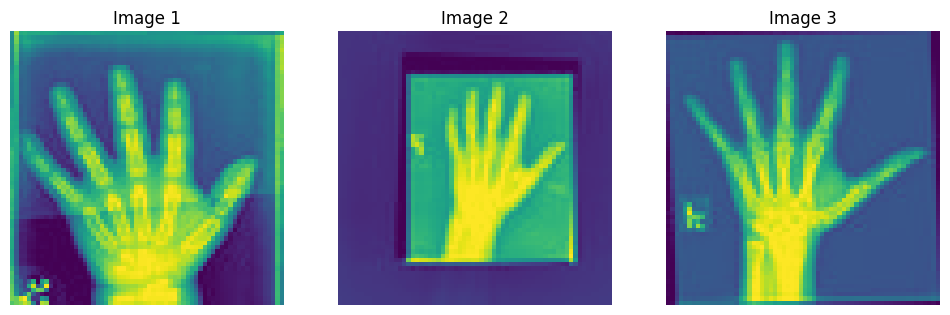


Subfolder: HeadCT
Number of Images: 10000


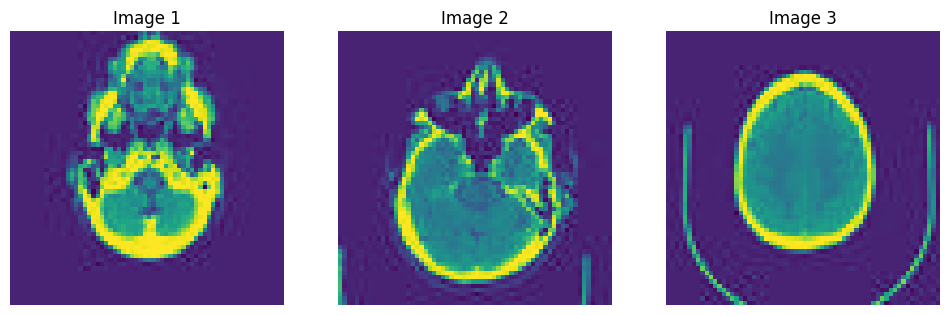

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

main_folder_path = "/kaggle/input/medical-mnist"

# Function to visualize sample images from a subfolder
def visualize_images(subfolder_path, num_images=3):
    images = os.listdir(subfolder_path)[:num_images]
    
    plt.figure(figsize=(12, 4))
    
    for i, image_name in enumerate(images, 1):
        image_path = os.path.join(subfolder_path, image_name)
        image = Image.open(image_path)
        
        plt.subplot(1, num_images, i)
        plt.imshow(image)
        plt.title(f"Image {i}")
        plt.axis("off")
    
    plt.show()

subfolders = ["AbdomenCT", "BreastMRI", "CXR", "ChestCT", "Hand", "HeadCT"]

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder_path, subfolder)
    
    print(f"\nSubfolder: {subfolder}")
    print(f"Number of Images: {len(os.listdir(subfolder_path))}")
    
    visualize_images(subfolder_path)

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images from a subfolder
def load_and_preprocess_images(main_folder_path, subfolders, target_size=(128, 128)):
    images = []
    labels = []

    for class_label, subfolder in enumerate(subfolders):
        subfolder_path = os.path.join(main_folder_path, subfolder)

        for image_name in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_name)

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, target_size)

            image = image / 255.0

            images.append(image)
            labels.append(class_label)

    return np.array(images), np.array(labels)

main_folder_path = "/kaggle/input/medical-mnist"
subfolders = ["AbdomenCT", "BreastMRI", "CXR", "ChestCT", "Hand", "HeadCT"]

all_images, all_labels = load_and_preprocess_images(main_folder_path, subfolders)

data_train, data_test, labels_train, labels_test = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

train_labels_onehot = to_categorical(labels_train, num_classes=len(subfolders))
test_labels_onehot = to_categorical(labels_test, num_classes=len(subfolders))

2024-02-03 05:32:47.606650: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 05:32:47.606770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 05:32:47.740499: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(subfolders), activation='softmax'))  # Output layer with the number of classes

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

# Training the model
history = model.fit(data_train.reshape(-1, 128, 128, 1), train_labels_onehot, 
                    epochs=10, 
                    validation_data=(data_test.reshape(-1, 128, 128, 1), test_labels_onehot))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

I0000 00:00:1706938818.888407      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1474/1474 [==============================] - 31s 17ms/step - loss: 0.0472 - accuracy: 0.9875 - val_loss: 0.0079 - val_accuracy: 0.9977
Epoch 2/10
1474/1474 [==============================] - 22s 15ms/step - loss: 0.0163 - accuracy: 0.9962 - val_loss: 0.0050 - val_accuracy: 0.9984
Epoch 3/10
1474/1474 [==============================] - 22s 15ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0030 - val_accuracy: 0.9987
Epoch 4/10
1474/1474 [==============================] - 23s 15ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 5/10
1474/1474 [==============================] - 23s 15ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0054 - val_accuracy: 0.9982
Epoch 6/10
1474/1474 [==============================] - 23s 15ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0067 - val_accuracy: 0.9981
Epoch 7/10
1474/1474 [==============================] - 23s 15ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0035 - val_accura

369/369 [==============================] - 2s 4ms/step


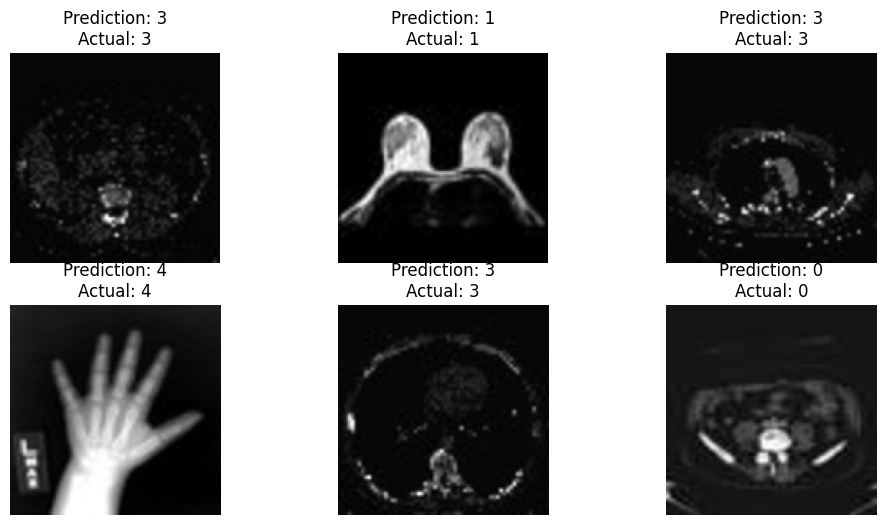

In [4]:
# Function to make predictions on test images
def predict_images(model, test_images):
    predictions = model.predict(test_images)
    return predictions

test_predictions = predict_images(model, data_test.reshape(-1, 128, 128, 1))

plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(data_test[i], cmap='gray')
    plt.title(f"Prediction: {np.argmax(test_predictions[i])}\nActual: {labels_test[i]}")
    plt.axis("off")

plt.show()

In [5]:
# Saving the trained model in .h5
model.save("/kaggle/working/medical_mnist_model.h5")

print("Model saved successfully.")

Model saved successfully.


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
# Saving the model in the native Keras format
model.save("/kaggle/working/medical_mnist_model", save_format="tf")

print("Model saved successfully in the native Keras format.")


Model saved successfully in the native Keras format.
